# Project 3b

This is the second part of the project where will ask you to perform your own data science project to classify a new dataset.

## Submission Details

**Project is due June 13th at 11:59 pm (Friday Midnight). To submit the project, please save the notebook
as a pdf file and submit the assignment via Gradescope. In addition, make sure that
all figures are legible and suﬀiciently large. For best pdf results, we recommend printing the notebook using [$\LaTeX$](https://www.latex-project.org/)**

## Loading Essentials and Helper Functions 

In [1]:
# fix for windows memory leak with MKL
import os
import platform

if platform.system() == "Windows":
    os.environ["OMP_NUM_THREADS"] = "2"

In [2]:
# import libraries
import time
import random
import numpy as np  # linear algebra
import pandas as pd  # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt  # this is used for the plot the graph

# Sklearn classes
from sklearn.model_selection import (
    train_test_split,
    cross_val_score,
    GridSearchCV,
    KFold,
)
from sklearn import metrics
from sklearn.metrics import confusion_matrix, silhouette_score
import sklearn.metrics.cluster as smc
from sklearn.cluster import KMeans
from sklearn.tree import DecisionTreeClassifier, export_text
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.preprocessing import (
    StandardScaler,
    OneHotEncoder,
    LabelEncoder,
    MinMaxScaler,
)
from sklearn.compose import ColumnTransformer, make_column_transformer
from sklearn import tree
from sklearn import datasets
from sklearn.decomposition import PCA
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import make_blobs

from helper import (
    draw_confusion_matrix,
    heatmap,
    make_meshgrid,
    plot_contours,
    draw_contour,
)

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

# Sets random seed for reproducibility
SEED = 66
random.seed(SEED)

In [3]:
from sklearn.metrics import f1_score

#If you encode the target labels with a different format (i.e. binary number), make sure to change the `pos_label` argument in the function calls below to reflect such change
def f1(y_true,y_predicted):
    #y_true: Ground truth (correct) target values
    #y_predicted: Estimated targets as returned by a classifier.
    return f1_score(y_true, y_predicted, pos_label="Yes")

from sklearn.metrics import f1_score
from sklearn.metrics import make_scorer

f1_scorer = make_scorer(f1_score, pos_label="Yes") #Make use of this one for GridSearchCV

# (50 pts) Putting it all together: Classify your own data

Through the course of this program, you have acquired knowledge and skills in applying various models to tackle supervised learning tasks. Now, we challenge you to harness your cumulative learning and create a model capable of predicting whether it will rain tomorrow according to the current weather conditions.

### Context
Predicting whether it will rain tomorrow is vital for daily decision-making in sectors like agriculture, transportation, and event planning, helping to reduce risks and optimize operations. It also plays a crucial role in public safety and resource management, allowing individuals and authorities to prepare for potential weather disruptions.

### Challenge
The goal of this project is to develop a predictive model that can determine whether it will rain tomorrow according to the available input parameters.

While we will provide specific instructions to guide you in the right direction, you have the freedom to choose the models and preprocessing techniques that you deem most appropriate. Upon completion, we request that you provide a detailed description outlining the models you selected and the rationale behind your choices.

### Data Description

The dataset includes 23 columns. The information provided by each column is as follows:
<ul>
    <li><b>Date:</b> The date of observation </li>
    <li><b>Location:</b> The common name of the location of the weather station</li>
    <li><b>MinTemp:</b> The minimum temperature in degrees celsius</li>
    <li><b>MaxTemp:</b> The maximum temperature in degrees celsius</li>
    <li><b>Rainfall:</b> The amount of rainfall recorded for the day in mm</li>
    <li><b>Evaporation:</b> The so-called Class A pan evaporation (mm) in the 24 hours to 9am</li>
    <li><b>Sunshine:</b> The number of hours of bright sunshine in the day.</li>
    <li><b>WindGustDir:</b> The direction of the strongest wind gust in the 24 hours to midnight</li>
    <li><b>WindGustSpeed:</b> The speed (km/h) of the strongest wind gust in the 24 hours to midnight</li>
    <li><b>WindDir9am:</b> Direction of the wind at 9am</li>
    <li><b>WindDir3pm:</b> Direction of the wind at 3pm</li>
    <li><b>WindSpeed9am:</b> Wind speed (km/hr) averaged over 10 minutes prior to 9am</li>
    <li><b>WindSpeed3pm:</b> Wind speed (km/hr) averaged over 10 minutes prior to 3pm</li>
    <li><b>Humidity9am:</b> Humidity (percent) at 9am</li>
    <li><b>Humidity3pm:</b> Humidity (percent) at 3pm</li>
    <li><b>Pressure9am:</b> Atmospheric pressure (hpa) reduced to mean sea level at 9am</li>
    <li><b>Pressure3pm:</b> Atmospheric pressure (hpa) reduced to mean sea level at 3pm</li>
    <li><b>Cloud9am:</b> Fraction of sky obscured by cloud at 9am. This is measured in "oktas", which are a unit of eigths. It records how many eigths of the sky are obscured by cloud. A 0 measure indicates completely clear sky whilst an 8 indicates that it is completely overcast.</li>
    <li><b>Cloud3pm:</b> Fraction of sky obscured by cloud (in "oktas": eighths) at 3pm. See Cload9am for a description of the values</li>
    <li><b>Temp9am:</b> Temperature (degrees C) at 9am</li>
    <li><b>Temp3pm:</b> Temperature (degrees C) at 3pm</li>
    <li><b>RainToday:</b> Boolean: 1 if precipitation (mm) in the 24 hours to 9am exceeds 1mm, otherwise 0</li>
    <li><b>RainTomorrow:</b> The amount of next day rain in mm. Used to create response variable RainTomorrow. A kind of measure of the "risk".</li>

</ul>


## (25 pts) Preprocessing
For the dataset, the following are mandatory pre-processing steps for your data:

- **Use One-Hot Encoding on categorical features if needed** (specify whether you keep the extra feature or not for features with multiple values)
- **Determine which fields if any need to be dropped**
- **Handle missing values** (Specify your strategy)
- **Rescale the real valued features using any strategy you choose** (StandardScaler, MinMaxScaler, Normalizer, etc)
- **Augment at least one feature**
- **Implement a strategy to balance your dataset according to the target class**
- **Implement a train-test split with 20% of the data going to the test data**. Make sure that the test and train data are balanced in terms of the desired class.

After writing your preprocessing code, write out a description of what you did for each step and provide a justification for your choices. All descriptions should be written in the markdown cells of the jupyter notebook. Make sure your writing is clear and professional.  

We highly recommend reading through the [scikit-learn documentation](https://scikit-learn.org/stable/data_transforms.html) to make this part easier.

The dataset is found in **datasets/weather_data.csv**

In [6]:
# Step 1: Load libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

# Step 2: Load the dataset
df = pd.read_csv('datasets/weather_data.csv')

# Step 3: Initial cleaning and exploration
# Drop 'Date' column (not used in modeling)

# Drop 'Date' column (not used in modeling)
df = df.drop(columns=['Date'])

# Drop rows with missing target label
df = df.dropna(subset=['RainTomorrow'])
df['RainTomorrow'] = df['RainTomorrow'].map({'Yes': 1, 'No': 0})
df['RainToday'] = df['RainToday'].map({'Yes': 1, 'No': 0})

# Feature engineering
df['TempDiff'] = df['MaxTemp'] - df['MinTemp']

# Define categorical and numerical columns
categorical_cols = ['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday']
numerical_cols = [
    'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed',
    'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
    'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm', 'TempDiff'
]

# Preprocessing pipeline
preprocessor = ColumnTransformer([
    ('num', Pipeline([
        ('impute', SimpleImputer(strategy='median')),
        ('scale', StandardScaler())
    ]), numerical_cols),
    ('cat', Pipeline([
        ('impute', SimpleImputer(strategy='most_frequent')),
        ('onehot', OneHotEncoder(drop='first'))
    ]), categorical_cols)
])

# Define features and target
X = df.drop(columns=['RainTomorrow'])
y = df['RainTomorrow']

# Train-test split (80/20, stratified)
X_train_raw, X_test_raw, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Fit and transform
X_train = preprocessor.fit_transform(X_train_raw)
X_test = preprocessor.transform(X_test_raw)

To preprocess my data, I:
- Dropped the Date variable since it was not informative in raw form and not needed for non-time-series models.
- Removed rows with missing RainTomorrow values, as they can’t be used for classification.
- Converted RainTomorrow and RainToday from "Yes"/"No" to 1/0 for model compatibility.
- Created a new feature TempDiff to capture daily temperature range, which may relate to rainfall.
- Categorical vs. Numerical features were separated to apply appropriate preprocessing:
- Numerical: imputed missing values with the median and standardized with StandardScaler.
- Categorical: imputed with most frequent value and one-hot encoded (drop first level).
- Train/test split was 80/20 using stratified sampling to preserve class balance.

## (25 pts) Try out a few models
Now that you have pre-processed your data, you are ready to try out different models. 

For this part of the project, we want you to experiment with all the different models demonstrated in the course to determine which one performs best on the dataset.

You must perform classification using at least 3 of the following models:
- Logistic Regression
- K-nearest neighbors
- SVM
- Decision Tree
- Multi-Layer Perceptron

Due to the size of the dataset, be careful which models you use and look at their documentation to see how you should tackle this size issue for each model.

For full credit, you must perform some hyperparameter optimization on your models of choice. You may find the following scikit-learn library on [hyperparameter optimization](https://scikit-learn.org/stable/modules/grid_search.html#grid-search) useful.

For each model chosen, write a justification, which parameters you optimized, and which parameters you choose for your best model. 
While the previous part of the project asked you to pre-process the data in a specific manner, you may alter pre-processing step as you wish to adjust for your chosen classification models.

Be sure to evaluate your models' performance not only with accuracy but other scores such as the [f1 score](https://scikit-learn.org/0.15/modules/generated/sklearn.metrics.f1_score.html) that provide a more comprehensive evaluation. We provide a version of it at the beginning, make sure to check it! Try to get a test score above 60%


In [ ]:
# Step 1: Load libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

# Step 2: Load the dataset
df = pd.read_csv('datasets/weather_data.csv')

# Step 3: Initial cleaning and exploration
# Drop 'Date' column (not used in modeling)

# Drop 'Date' column (not used in modeling)
df = df.drop(columns=['Date'])

# Drop rows with missing target label
df = df.dropna(subset=['RainTomorrow'])
df['RainTomorrow'] = df['RainTomorrow'].map({'Yes': 1, 'No': 0})
df['RainToday'] = df['RainToday'].map({'Yes': 1, 'No': 0})

# Feature engineering
df['TempDiff'] = df['MaxTemp'] - df['MinTemp']

# Define categorical and numerical columns
categorical_cols = ['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday']
numerical_cols = [
    'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed',
    'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
    'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm', 'TempDiff'
]

# Preprocessing pipeline
preprocessor = ColumnTransformer([
    ('num', Pipeline([
        ('impute', SimpleImputer(strategy='median')),
        ('scale', StandardScaler())
    ]), numerical_cols),
    ('cat', Pipeline([
        ('impute', SimpleImputer(strategy='most_frequent')),
        ('onehot', OneHotEncoder(drop='first'))
    ]), categorical_cols)
])

# Define features and target
X = df.drop(columns=['RainTomorrow'])
y = df['RainTomorrow']

# Train-test split (80/20, stratified)
X_train_raw, X_test_raw, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Fit and transform
X_train = preprocessor.fit_transform(X_train_raw)
X_test = preprocessor.transform(X_test_raw)

Best Logistic Regression Parameters: {'C': 10.0}
Logistic Regression Accuracy: 0.8490101621013397
Confusion Matrix: [[20874  1190]
 [ 3104  3271]]
F1 Score: 0.6037283130306386


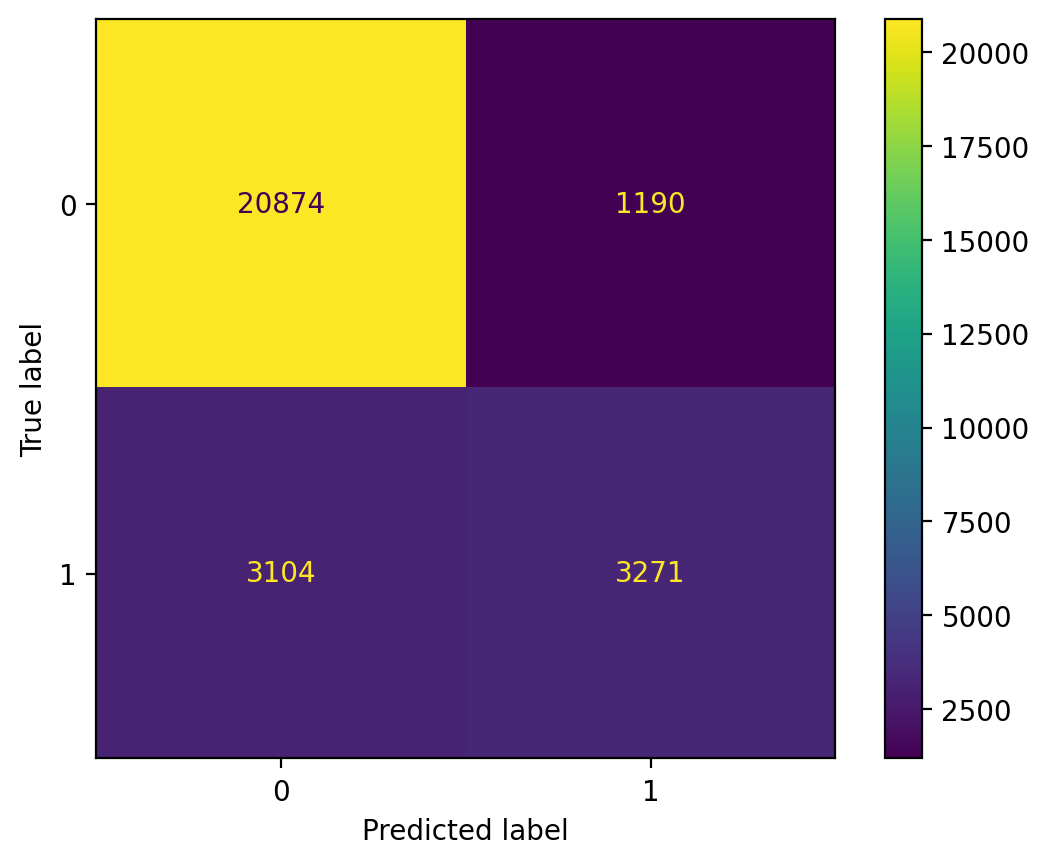

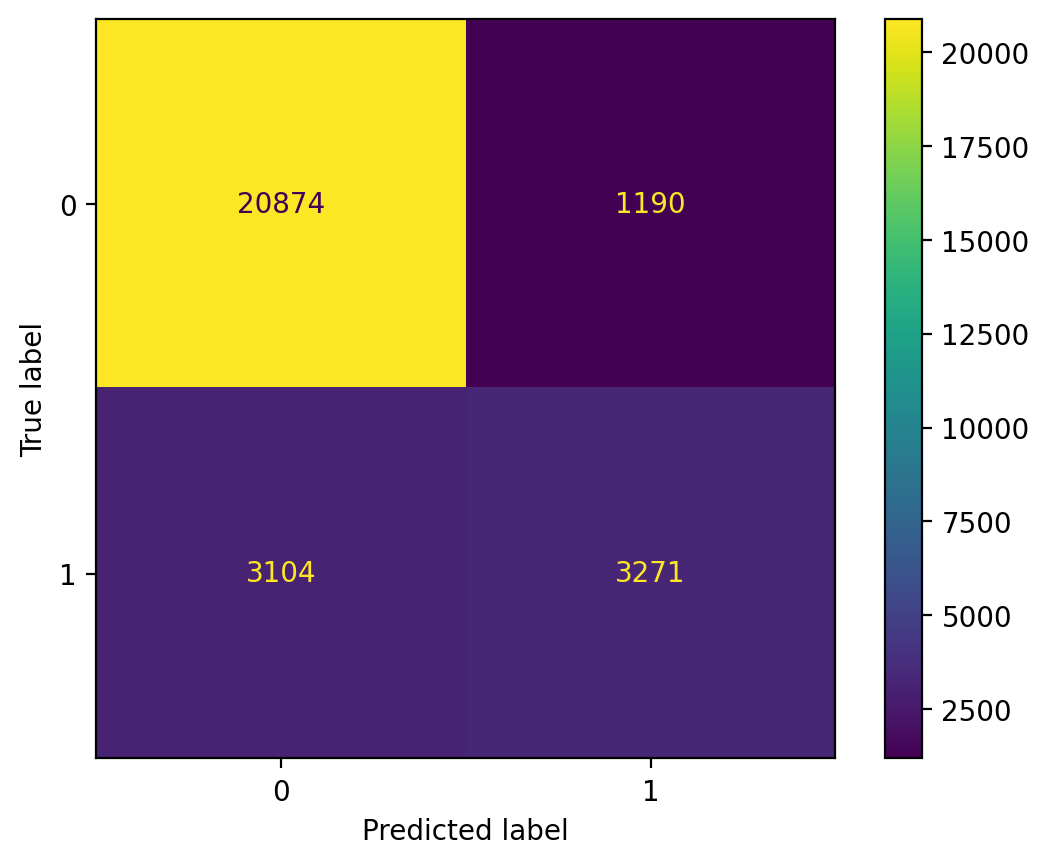

In [10]:
# # Logistic Regression
logreg = LogisticRegression(max_iter=1000)
log_params = {'C': [0.1, 1.0, 10.0]}
log_grid = GridSearchCV(logreg, log_params, cv=5)
log_grid.fit(X_train, y_train)
y_pred_log = log_grid.predict(X_test)

print("Best Logistic Regression Parameters:", log_grid.best_params_)
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_log))
print("Confusion Matrix:" ,
confusion_matrix(y_test, y_pred_log))
ConfusionMatrixDisplay.from_estimator(log_grid, X_test, y_test).plot()

from sklearn.metrics import f1_score

f1 = f1_score(y_test, y_pred_log)
print("F1 Score:", f1)


For the first model, I chose linear regression. This is because I wanted a model that was efficient on linearly seperable datasets, as it is a strong baseline for binary classification (like predicting rainfall). I applied GridSearchCV with 5 fold cross validation, testing on C values 0.1, 1, and 10. The best parameter ended up being C = 10. The F1 score also reached approximately 0.60. The preprocessing pipeline for Logistic Regression included imputing missing values, scaling numerical features using StandardScaler, and one-hot encoding categorical variables with drop='first' to avoid multicollinearity. No additional changes were made specifically for Logistic Regression preprocessing because it performs well with standardized and linearly encoded features.


Best Decision Tree Parameters: {'criterion': 'gini', 'max_depth': 8, 'min_samples_split': 4}
Decision Tree Accuracy: 0.8416610991947677
F1 Score: 0.5720802052646584
Confusion Matrix: [[20926  1138]
 [ 3365  3010]]


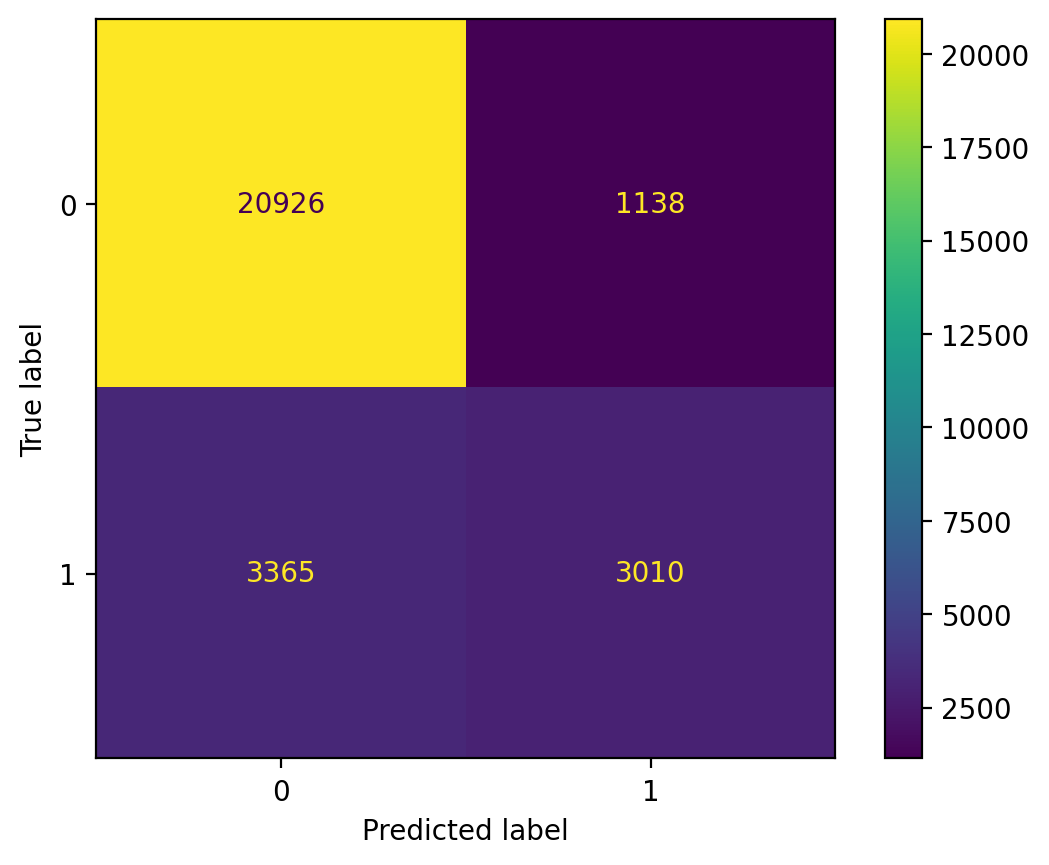

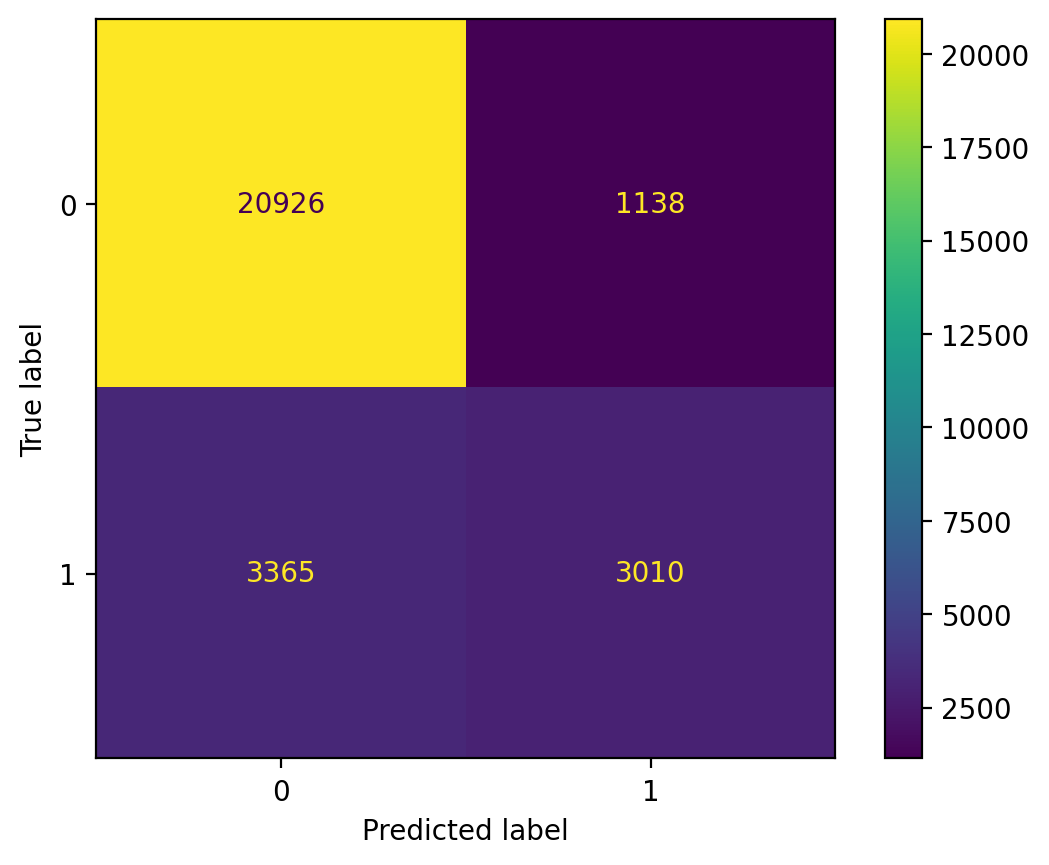

In [14]:
#Decision tree
from sklearn.metrics import f1_score

dt = DecisionTreeClassifier(random_state=SEED)
dt_params = {
    'max_depth': [8, 16],
    'min_samples_split': [4, 8],
    'criterion': ['gini']
}
dt_grid = GridSearchCV(dt, dt_params, cv=5)
dt_grid.fit(X_train, y_train)
y_pred_dt = dt_grid.predict(X_test)

print("Best Decision Tree Parameters:", dt_grid.best_params_)
print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred_dt))
print("F1 Score:", f1_score(y_test, y_pred_dt))
print("Confusion Matrix:", confusion_matrix(y_test, y_pred_dt))
ConfusionMatrixDisplay.from_estimator(dt_grid, X_test, y_test).plot()

For my second model, I decided to do a decision tree. This is because decision trees are good at capturing non linear patterns without feature scaling. 
I used GridSearchCV with 5 fold cross validation, putting max_depth at [8,16] to control the depth of the tree and prevent overfitting. For the min_samples_split, I put [4,8] to prevent the tree from creating small, overly specific branches. 
For splitting, I used the Gini impurity measure. 
The best-performing model had the parameters max_depth = 8, min_samples_split = 4, and criterion = 'gini'. This model achieved a test accuracy of 84.17% and an F1 score of 0.572.
I used the same preprocessing pipeline as with Logistic Regression, like one hot encoding and standard scaling for numerical features. The additional feature TempDiff(dailymax-dailymin) was also included. 

Fitting 5 folds for each of 4 candidates, totalling 20 fits
Best MLP Parameters: {'alpha': 0.001, 'hidden_layer_sizes': (100,)}
MLP Accuracy: 0.8650093181898098
F1 Score: 0.6604157452454666
Confusion Matrix: [[20867  1197]
 [ 2642  3733]]


/opt/miniconda3/envs/ece148/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:698: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


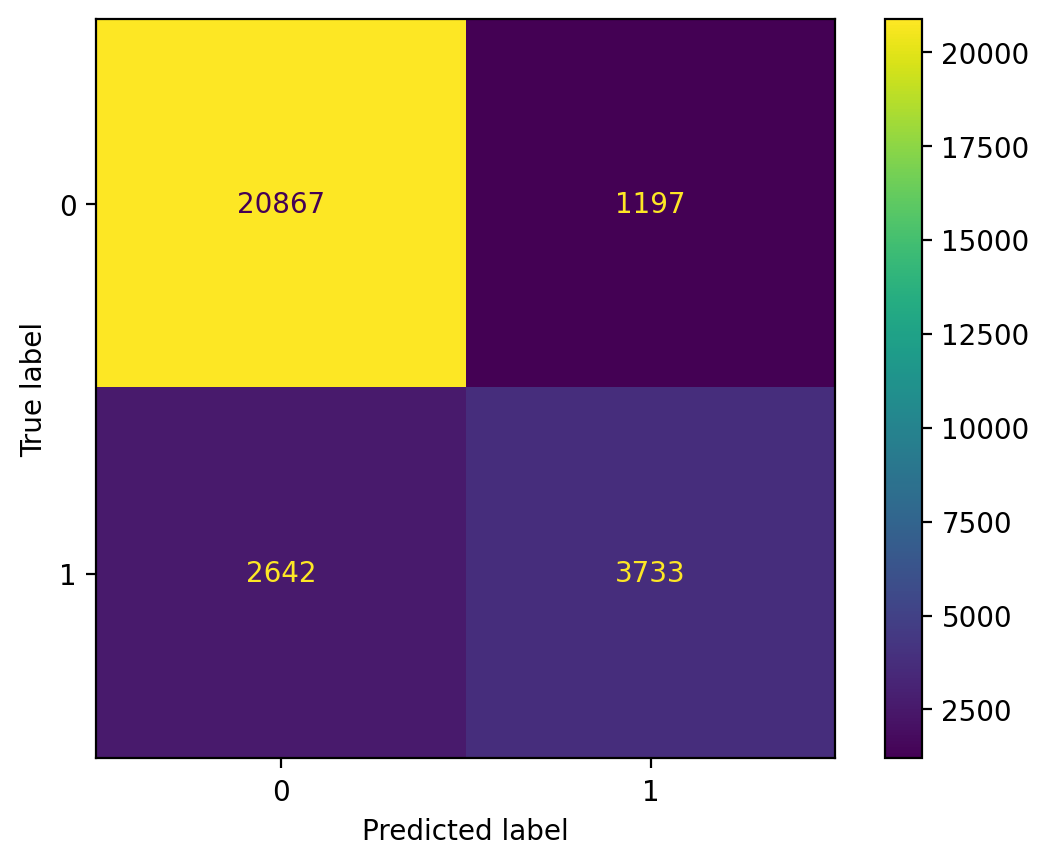

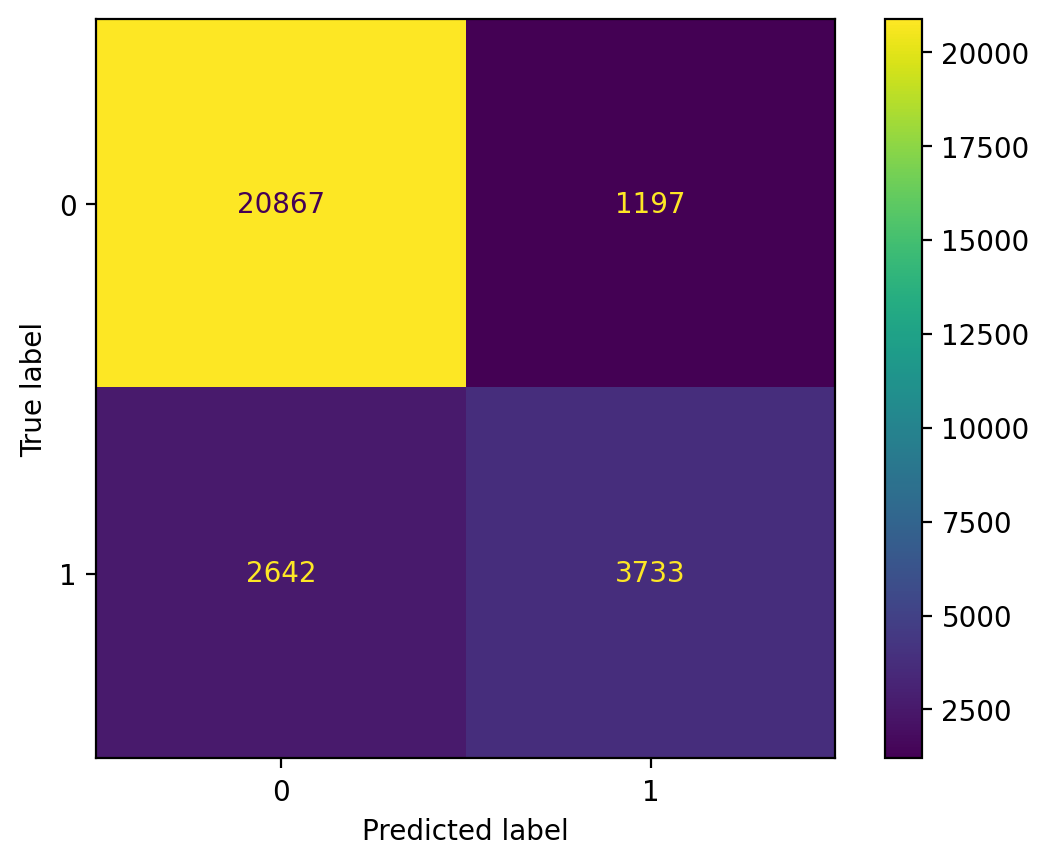

In [18]:
# Multi Linear Processing model
mlp = MLPClassifier(max_iter=1000, random_state=SEED)
mlp_params = {
    'hidden_layer_sizes': [(100,), (50, 50)],
    'alpha': [0.0001, 0.001]
}
mlp_grid = GridSearchCV(mlp, mlp_params, cv=5, n_jobs=-1, verbose=1)
mlp_grid.fit(X_train, y_train)
y_pred_mlp = mlp_grid.predict(X_test)

print("Best MLP Parameters:", mlp_grid.best_params_)
print("MLP Accuracy:", accuracy_score(y_test, y_pred_mlp))
print("F1 Score:", f1_score(y_test, y_pred_mlp))
print("Confusion Matrix:", confusion_matrix(y_test, y_pred_mlp))
ConfusionMatrixDisplay.from_estimator(mlp_grid, X_test, y_test).plot()

For the final model, I chose MLP because it can model complex, non linear relationships and performs well on larger datasets such as this one. I set the hidden layer sizes [(100,), (50, 50)] and the alpha: [0.0001, 0.001] for regularization

The best model used 100 hidden units and alpha = 0.001, resulting in a test accuracy of 86.5% and an F1 score of 0.66, the highest of all models. I kept the same preprocessing pipeline (imputation, scaling, and one-hot encoding) to ensure consistency.

## Extra Credit 

We will award a bonus point for the project for every percentage point over 60% that you get on any of your models' f1 test score using the provided **f1** function.